In [44]:
import numpy as np
from scipy import linalg
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [10]:
# Kiểm tra xem 1 vector có phải 1 tổ hợp tuyến tính
x1 = np.array([1,-2,3,1])
x2 = np.array([2,5,-2,4])
x3 = np.array([1,1,0,2])
v = np.array([-7,2,5,3])
X_bar = np.vstack([x1,x2,x3, v]).T
print(X_bar)
U = linalg.lu(X_bar)[-1]
print(U)
print("He pt vo nghiem => khong co to hop tuyen tinh.")



[[ 1  2  1 -7]
 [-2  5  1  2]
 [ 3 -2  0  5]
 [ 1  4  2  3]]
[[  3.          -2.           0.           5.        ]
 [  0.           4.66666667   2.           1.33333333]
 [  0.           0.          -0.57142857   4.28571429]
 [  0.           0.           0.         -10.5       ]]


In [15]:
# Kiem tra su doc lap hay phu thuoc tuyen tinh
v1 = np.array([1, -5, -4, 2])
v2 = np.array([3, -7, 1, 5])
v3 = np.array([-2, 2, -5, -3])
V = np.stack([v1, v2, v3]).T
print(V)
r = np.linalg.matrix_rank(V)
if r == 3:
    print("He doc lap tuyen tinh.")
else:
    print("He phu thuoc tuyen tinh.")

[[ 1  3 -2]
 [-5 -7  2]
 [-4  1 -5]
 [ 2  5 -3]]
He phu thuoc tuyen tinh.


In [20]:
# Xác định cơ sở của không gian với hệ sinh cho trước U = span(x1, x2, x3, ...)
x1 = np.array([1,2,-1,-1])
x2 = np.array([2,-1,1,2])
x3 = np.array([3,-4,3,5])
x4 = np.array([-1,8,-5,-6])
X = np.vstack([x1,x2,x3,x4]).T
print(X)
U = linalg.lu(X)[-1]
print(U)
print('x1,x2')

[[ 1  2  3 -1]
 [ 2 -1 -4  8]
 [-1  1  3 -5]
 [-1  2  5 -6]]
[[ 2.0000000e+00 -1.0000000e+00 -4.0000000e+00  8.0000000e+00]
 [ 0.0000000e+00  2.5000000e+00  5.0000000e+00 -5.0000000e+00]
 [ 0.0000000e+00  0.0000000e+00 -4.4408921e-16  1.0000000e+00]
 [ 0.0000000e+00  0.0000000e+00  0.0000000e+00 -1.2500000e-01]]
x1,x2


In [28]:
# Tim toa do
b1 = np.array([1,2,-2])
b2 = np.array([2,1,2])
b3 = np.array([-2,2,1])
B = np.vstack([b1,b2,b3]).T
np.linalg.matrix_rank(B)
x = np.random.randint(-5,5,3)
print(x)
print('Toa do cua vector x:', np.linalg.solve(B, x))

# Tim toa do trong khong gian con cua R4 co co so b1,b2,b3

b1 = np.array([1,-2,1,4])
b2 = np.array([-5,2,1,7])
b3 = np.array([3,0,-4,2])
B = np.vstack([b1,b2,b3]).T
np.linalg.matrix_rank(B) # Kiem tra co so
x = 2*b1 - b2 + 3*b3
print(x)
np.linalg.lstsq(B,x,rcond=None)[0] # Note: vo nghiem cung tim duoc nghiem.


[-5  2 -5]
Toa do cua vector x: [ 1. -2.  1.]
[ 16  -6 -11   7]


array([ 2., -1.,  3.])

In [39]:
# Ma tran chuyen co so tu B sang C
b1 = np.array([1, 0, 0])
b2 = np.array([1, 1, 0])
b3 = np.array([1, 1, 1])
B = np.vstack([b1,b2,b3]).T


c1 = np.array([1,2,-2])
c2 = np.array([2,1,2])
c3 = np.array([-2,2,1])
C = np.vstack([c1,c2,c3]).T

coor_b1 = np.linalg.solve(C,b1)
coor_b2 = np.linalg.solve(C,b2)
coor_b3 = np.linalg.solve(C,b3)

P_B2C = np.vstack([coor_b1, coor_b2, coor_b3]).T
print(P_B2C)
# Cách khác CxP = B = [b1,b2,b3]
P_B2C = np.linalg.inv(C)@B
print(P_B2C)

[[ 0.11111111  0.33333333  0.11111111]
 [ 0.22222222  0.33333333  0.55555556]
 [-0.22222222 -0.          0.11111111]]
[[ 0.11111111  0.33333333  0.11111111]
 [ 0.22222222  0.33333333  0.55555556]
 [-0.22222222  0.          0.11111111]]


Cac tham so: [ 4.13651312 -3.02514413  0.30565193]


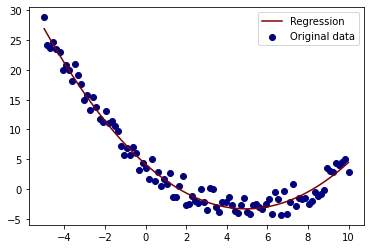

In [51]:
# Xay dung mo hinh hoi quy da thuc
n = 100
e = 5 * np.random.rand(n)
x = np.linspace(-5,10,n)
y = 2 - 3 * x + 0.3*x **2 + e



# Uoc luong mo hinh
X = np.vstack([np.ones(n), x, x**2]).T
model = LinearRegression(fit_intercept=False)
model.fit(X, y)
print("Cac tham so:", model.coef_)

# Vẽ biểu đồ
plt.scatter(x,y,color="Navy", label="Original data")
yfit = model.predict(X)
plt.plot(x,yfit,color='maroon', label="Regression")
plt.legend()
plt.show()


In [50]:
from scipy.optimize import curve_fit

In [52]:
def f(x,a,b,c):
    return a + b*x + c*x**2
popt, pcov =curve_fit(f,x,y)
print("Tham so cua mo hinh: ", popt)

Tham so cua mo hinh:  [ 4.13651312 -3.02514413  0.30565193]
